In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# IRIS

In [2]:
geo_iris = gpd.read_file("../data/processed/44055/iris/demand_per_hab.geojson")
geo_iris

,code_iris,nom_iris,revenues,population,density_km2,demand_pop_kWh,geometry
0,440550101,La Baule les Pins,31760,2346.994576,1290.289305,463.191521,"MULTIPOLYGON (((-2.35133 47.27244, -2.35149 47..."
1,440550102,Centre-Benoît,31940,1616.919056,1029.639154,321.254665,"MULTIPOLYGON (((-2.38127 47.27993, -2.38559 47..."
2,440550103,Gare-Grand Clos,26750,1869.032071,1584.310324,317.430572,"MULTIPOLYGON (((-2.4273 47.27833, -2.42724 47...."
3,440550104,Beslon,23160,2408.488869,1057.621831,206.515939,"MULTIPOLYGON (((-2.40491 47.28723, -2.40464 47..."
4,440550105,Escoublac,27110,3511.317978,421.501327,218.825894,"MULTIPOLYGON (((-2.38977 47.30009, -2.38918 47..."
5,440550106,Le Guézy,27800,4467.253898,394.213733,282.994680,"MULTIPOLYGON (((-2.29702 47.3032, -2.2972 47.3..."


In [51]:
locations = geo_iris.index.to_list()

demands_kWh = geo_iris["demand_pop_kWh"].to_list()
demands_pop = geo_iris["population"].to_list()

prices_kWh = [0.25] * len(locations)
prices_pop = [20] * len(locations)

costs = [60000 / (365 * 15)] * len(locations)

station_capacity_kWh = 60 * 8 # 60kW * 8h
station_capacity_pop = 1e6 / geo_iris["density_km2"].mean()

max_distance = 2
max_total_stations = 5
existing_stations = None
existing_station_capacity = None
max_stations_per_location = 5

# Adjacency matrix
adjacency = np.load("../data/processed/44055/iris/adjacency_matrix.npy")

# Genetic parameters
population_size = 100
mutation_rate = 0.2
crossover_rate = 0.8
elite_size = 10
max_generations = 100

In [ ]:
from GA import ChargingStationGA

simulation_type = "kWh"  # ou "kWh"

# Genetic algorithm
ga = ChargingStationGA(
    locations,
    demands_pop if simulation_type == "pop" else demands_kWh,
    prices_pop if simulation_type == "pop" else prices_kWh,
    costs,
    max_distance,
    station_capacity_pop if simulation_type == "pop" else station_capacity_kWh,
    max_total_stations,
    existing_stations,
    existing_station_capacity,
    max_stations_per_location,
    population_size,
    mutation_rate,
    crossover_rate,
    elite_size,
    max_generations,
    adjacency,
)
solution_iris, stats_iris = ga.run()



# Adaptation des variables en fonction du type de simulation
if simulation_type == "kWh":
    demand_unit = "kWh"
    actual_coverage = float(stats_iris["coverage"] * sum(demands_kWh))
    actual_capacity = float(sum(solution_iris) * station_capacity_kWh)
elif simulation_type == "pop":
    demand_unit = "pop"
    actual_coverage = float(stats_iris["coverage"] * sum(demands_pop))
    actual_capacity = float(sum(solution_iris) * station_capacity_pop)


# Enregistrement des résultats
results = {
    "zone": "iris",
    "demand": demand_unit,
    "solution": solution_iris.tolist(),
    "actual_coverage": actual_coverage,
    "actual_capacity": actual_capacity,
    "parameters": {
        "population_size": population_size,
        "mutation_rate": mutation_rate,
        "crossover_rate": crossover_rate,
        "elite_size": elite_size,
        "max_generations": max_generations,
        "max_distance": max_distance,
        "station_capacity_kWh": station_capacity_kWh,
        "station_capacity_pop": station_capacity_pop,  # Ajout si pertinent
        "max_total_stations": max_total_stations,
        "max_stations_per_location": max_stations_per_location,
    },
}
print(results)

# Enregistrement des résultats
import json

# Nom du fichier dépendant du type de simulation
filename = f"results/iris/results_{results['zone']}_{simulation_type}_{results['parameters']['max_total_stations']}.json"

# Sauvegarde dans un fichier JSON
with open(filename, "w") as f:
    json.dump(results, f, indent=4)


Starting genetic algorithm optimization...
Station capacity: 480 kWh/day
Maximum total stations: 5
Generation 0: Fitness = 355.36, Profit: 266.77, Coverage: 88.59, Avg Satisfaction: 100.0%, Stations: 5
Generation 10: Fitness = 434.72, Profit: 346.13, Coverage: 88.59, Avg Satisfaction: 100.0%, Stations: 5
Generation 20: Fitness = 434.72, Profit: 346.13, Coverage: 88.59, Avg Satisfaction: 100.0%, Stations: 5
Generation 30: Fitness = 434.72, Profit: 346.13, Coverage: 88.59, Avg Satisfaction: 100.0%, Stations: 5
Generation 40: Fitness = 434.72, Profit: 346.13, Coverage: 88.59, Avg Satisfaction: 100.0%, Stations: 5
Generation 50: Fitness = 434.72, Profit: 346.13, Coverage: 88.59, Avg Satisfaction: 100.0%, Stations: 5
Generation 60: Fitness = 434.72, Profit: 346.13, Coverage: 88.59, Avg Satisfaction: 100.0%, Stations: 5
Generation 70: Fitness = 434.72, Profit: 346.13, Coverage: 88.59, Avg Satisfaction: 100.0%, Stations: 5
Generation 80: Fitness = 434.72, Profit: 346.13, Coverage: 88.59, Avg 

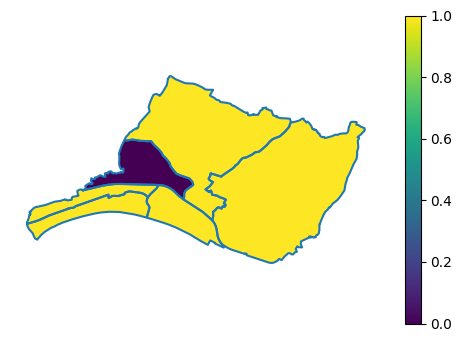

In [53]:
geo_iris["solution"] = solution_iris

fig, ax = plt.subplots(figsize=(6, 4))
geo_iris.boundary.plot(ax=ax)
geo_iris.plot(column='solution', ax=ax, legend=True)
ax.set_axis_off()
plt.show()

# 1km

In [54]:
geo_1km = gpd.read_file("../data/processed/44055/1km/gdf_city_with_dist.gpkg")
geo_1km.head()

,id,population,density_km2,niveau_de_vie_moyen,demand_pop_kWh,demand_traffic_kWh,total_demand_kWh,concu_nb_pdc,vinci_nb_pdc,nb_pdc,...,dist_36,dist_37,dist_38,dist_39,dist_40,dist_41,dist_42,dist_43,dist_44,geometry
0,CRS3035RES1000mN2761000E3390000,355.0,355.614191,29963.222254,48.172830,0.000000,48.172830,0.0,0.0,0.0,...,5.004289,5.665575,6.415565,5.363373,5.079982,4.985151,5.089426,6.060643,5.982180,"POLYGON ((-2.35724 47.26121, -2.35937 47.27007..."
1,CRS3035RES1000mN2761000E3391000,2108.0,2111.645642,27232.834250,204.580618,0.000000,204.580618,0.0,12.0,12.0,...,4.471250,5.004286,5.665562,5.807820,5.363407,5.080016,4.985181,6.299356,6.060683,"POLYGON ((-2.34418 47.26271, -2.34631 47.27156..."
2,CRS3035RES1000mN2761000E3392000,115.0,115.198806,27779.578261,0.439140,0.139226,0.578365,0.0,0.0,0.0,...,4.116594,4.471257,5.004283,6.379721,5.807851,5.363441,5.080050,6.681128,6.299397,"POLYGON ((-2.33112 47.2642, -2.33325 47.27306,..."
3,CRS3035RES1000mN2761000E3393000,58.0,58.100227,26093.732759,0.000000,0.904665,0.904665,0.0,0.0,0.0,...,3.988194,4.116611,4.471264,7.048117,6.379747,5.807882,5.363474,7.183185,6.681168,"POLYGON ((-2.31807 47.26569, -2.32019 47.27455..."
4,CRS3035RES1000mN2762000E3389000,271.0,271.467944,33466.048708,32.093207,0.000000,32.093207,4.0,0.0,4.0,...,5.010184,5.844076,6.723794,4.107195,3.988095,4.116531,4.471217,4.985118,5.089390,"POLYGON ((-2.37243 47.26857, -2.37456 47.27743..."


In [96]:
# Parameters
locations = geo_1km.index.to_list()

demands_kWh = geo_1km["demand_pop_kWh"].to_list()
demands_pop = geo_1km["population"].to_list()

prices_kWh = [0.25] * len(locations)
prices_pop = [20] * len(locations)

costs = [60000 / (365 * 15)] * len(locations)

station_capacity_kWh = 60 * 8 # 60kW * 8h
station_capacity_pop = 1e6 / geo_1km["density_km2"].mean()

max_distance = 2
max_total_stations = 10
existing_stations = None
existing_station_capacity = None
max_stations_per_location = 5

# Adjacency matrix
adjacency = np.load("../data/processed/44055/1km/adjacency_matrix.npy")

# Genetic parameters
population_size = 100
mutation_rate = 0.2
crossover_rate = 0.8
elite_size = 10
max_generations = 100

In [97]:
simulation_type = "kWh"  # ou "kWh"

ga_1km = ChargingStationGA(
    locations,
    demands_pop if simulation_type == "pop" else demands_kWh,
    prices_pop if simulation_type == "pop" else prices_kWh,
    costs,
    max_distance,
    station_capacity_pop if simulation_type == "pop" else station_capacity_kWh,
    max_total_stations,
    existing_stations,
    existing_station_capacity,
    max_stations_per_location,
    population_size,
    mutation_rate,
    crossover_rate,
    elite_size,
    max_generations,
    adjacency,
)
solution_1km, stats_1km = ga_1km.run()



# Adaptation des variables en fonction du type de simulation
if simulation_type == "kWh":
    demand_unit = "kWh"
    actual_coverage = float(stats_1km["coverage"] * sum(demands_kWh))
    actual_capacity = float(sum(solution_1km) * station_capacity_kWh)
elif simulation_type == "pop":
    demand_unit = "pop"
    actual_coverage = float(stats_1km["coverage"] * sum(demands_pop))
    actual_capacity = float(sum(solution_1km) * station_capacity_pop)


# Enregistrement des résultats
results = {
    "zone": "1km",
    "demand": demand_unit,
    "solution": solution_1km.tolist(),
    "actual_coverage": actual_coverage,
    "actual_capacity": actual_capacity,
    "parameters": {
        "population_size": population_size,
        "mutation_rate": mutation_rate,
        "crossover_rate": crossover_rate,
        "elite_size": elite_size,
        "max_generations": max_generations,
        "max_distance": max_distance,
        "station_capacity_kWh": station_capacity_kWh,
        "station_capacity_pop": station_capacity_pop,
        "max_total_stations": max_total_stations,
        "max_stations_per_location": max_stations_per_location,
    },
}

# Enregistrement des résultats
import json

# Nom du fichier dépendant du type de simulation
filename = f"results/1km/results_{results['zone']}_{simulation_type}_{results['parameters']['max_total_stations']}.json"

# Sauvegarde dans un fichier JSON
with open(filename, "w") as f:
    json.dump(results, f, indent=4)


Starting genetic algorithm optimization...
Station capacity: 480 kWh/day
Maximum total stations: 10
Generation 0: Fitness = 151.67, Profit: 63.95, Coverage: 87.72, Avg Satisfaction: 100.0%, Stations: 10
Generation 10: Fitness = 266.78, Profit: 168.36, Coverage: 98.42, Avg Satisfaction: 100.0%, Stations: 9
Generation 20: Fitness = 308.80, Profit: 210.39, Coverage: 98.41, Avg Satisfaction: 100.0%, Stations: 10
Generation 30: Fitness = 308.80, Profit: 210.39, Coverage: 98.41, Avg Satisfaction: 100.0%, Stations: 10
Generation 40: Fitness = 321.46, Profit: 223.22, Coverage: 98.24, Avg Satisfaction: 100.0%, Stations: 10
Generation 50: Fitness = 322.17, Profit: 223.44, Coverage: 98.74, Avg Satisfaction: 100.0%, Stations: 10
Generation 60: Fitness = 322.17, Profit: 223.44, Coverage: 98.74, Avg Satisfaction: 100.0%, Stations: 10
Generation 70: Fitness = 340.40, Profit: 242.16, Coverage: 98.24, Avg Satisfaction: 100.0%, Stations: 10
Generation 80: Fitness = 340.40, Profit: 242.16, Coverage: 98.2

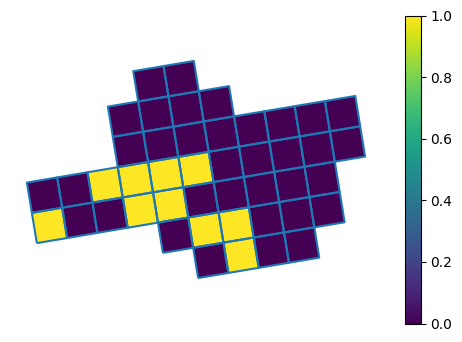

In [98]:
# Plot 
geo_1km["solution"] = solution_1km
geo_1km["solution"] = geo_1km["solution"].astype(int)
fig, ax = plt.subplots(figsize=(6, 4))
geo_1km.boundary.plot(ax=ax)
geo_1km.plot(column='solution', ax=ax, legend=True)
ax.set_axis_off()
plt.show()

# 200m

In [73]:
geo_200 = gpd.read_file("../data/processed/44055/200/gdf_city_with_dist.gpkg")
geo_200.head()

,id,population,density_km2,niveau_de_vie_moyen,demand_pop_kWh,demand_traffic_kWh,total_demand_kWh,concu_nb_pdc,vinci_nb_pdc,nb_pdc,...,dist_422,dist_423,dist_424,dist_425,dist_426,dist_427,dist_428,dist_429,dist_430,geometry
0,CRS3035RES200mN2761400E3391600,31.5,788.861822,29316.704762,1.051370,0.0,1.051370,0.0,0.0,0.0,...,4.689689,5.534841,5.436998,4.884685,4.848552,4.820473,5.018388,5.790279,5.750147,"POLYGON ((-2.3372 47.26715, -2.33762 47.26892,..."
1,CRS3035RES200mN2761400E3391800,26.0,651.123954,23425.138462,0.000000,0.0,0.000000,0.0,0.0,0.0,...,4.735559,5.638107,5.534847,4.928702,4.884691,4.848558,5.045333,5.882190,5.801296,"POLYGON ((-2.33459 47.26745, -2.33501 47.26922..."
2,CRS3035RES200mN2761400E3392000,2.0,50.086451,28876.200000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,4.789369,5.746497,5.638112,4.980388,4.928708,4.884698,5.080036,5.979397,5.858848,"POLYGON ((-2.33197 47.26774, -2.3324 47.26952,..."
3,CRS3035RES200mN2761600E3391200,93.5,2341.540973,24798.703743,11.284012,0.0,11.284012,0.0,0.0,0.0,...,4.425035,5.167523,5.078366,4.622676,4.601897,4.589769,4.788994,5.440463,5.471568,"POLYGON ((-2.34285 47.26832, -2.34327 47.27009..."
4,CRS3035RES200mN2761600E3391400,72.0,1803.111518,27235.497222,0.890049,0.0,0.890049,0.0,0.0,0.0,...,4.455699,5.262799,5.167529,4.651996,4.622682,4.601903,4.800585,5.523716,5.510797,"POLYGON ((-2.34023 47.26862, -2.34066 47.27039..."


In [126]:
# Parameters
locations = geo_200.index.to_list()

demands_kWh = geo_200["demand_pop_kWh"].to_list()
demands_pop = geo_200["population"].to_list()

prices_kWh = [0.25] * len(locations)
prices_pop = [20] * len(locations)

costs = [60000 / (365 * 15)] * len(locations)

station_capacity_kWh = 60 * 8 # 60kW * 8h
station_capacity_pop = 1e6 / geo_200["density_km2"].mean()

max_distance = 2
max_total_stations = 50
existing_stations = {i: 1 for i in [9,37,62,96,100,135,152,156,157,166,184,211,212,218,219,220,246,247,248,276,313]}

existing_station_capacity_kWh = 20 * 8
existing_station_capacity_pop = 1e6 / geo_200["density_km2"].mean()


max_stations_per_location = 10

# Adjacency matrix
adjacency = np.load("../data/processed/44055/200/adjacency_matrix.npy")

# Genetic parameters
population_size = 100
mutation_rate = 0.2
crossover_rate = 0.8
elite_size = 10
max_generations = 100

In [127]:
simulation_type = "kWh"  # ou "kWh"

ga_200 = ChargingStationGA(
    locations,
    demands_pop if simulation_type == "pop" else demands_kWh,
    prices_pop if simulation_type == "pop" else prices_kWh,
    costs,
    max_distance,
    station_capacity_pop if simulation_type == "pop" else station_capacity_kWh,
    max_total_stations,
    existing_stations,
    existing_station_capacity_pop if simulation_type == "pop" else existing_station_capacity_kWh,
    max_stations_per_location,
    population_size,
    mutation_rate,
    crossover_rate,
    elite_size,
    max_generations,
    adjacency,
)
solution_200, stats_200 = ga_200.run()



# Adaptation des variables en fonction du type de simulation
if simulation_type == "kWh":
    demand_unit = "kWh"
    actual_coverage = float(stats_200["coverage"] * sum(demands_kWh))
    actual_capacity = float(sum(solution_200) * station_capacity_kWh)
elif simulation_type == "pop":
    demand_unit = "pop"
    actual_coverage = float(stats_200["coverage"] * sum(demands_pop))
    actual_capacity = float(sum(solution_200) * station_capacity_pop)


# Enregistrement des résultats
results = {
    "zone": "200m",
    "demand": demand_unit,
    "solution": solution_200.tolist(),
    "actual_coverage": actual_coverage,
    "actual_capacity": actual_capacity,
    "parameters": {
        "population_size": population_size,
        "mutation_rate": mutation_rate,
        "crossover_rate": crossover_rate,
        "elite_size": elite_size,
        "max_generations": max_generations,
        "max_distance": max_distance,
        "station_capacity_kWh": station_capacity_kWh,
        "station_capacity_pop": station_capacity_pop,
        "max_total_stations": max_total_stations,
        "max_stations_per_location": max_stations_per_location,
    },
}

# Enregistrement des résultats
import json

# Nom du fichier dépendant du type de simulation
filename = f"results/200m/results_{results['zone']}_{simulation_type}_{results['parameters']['max_total_stations']}_{1 if existing_stations else 0}.json"

# Sauvegarde dans un fichier JSON
with open(filename, "w") as f:
    json.dump(results, f, indent=4)

Starting genetic algorithm optimization...
Station capacity: 480 kWh/day
Maximum total stations: 50
Generation 0: Fitness = -407.27, Profit: -491.30, Coverage: 84.03, Avg Satisfaction: 100.0%, Stations: 50


/Users/maximemoutet/Documents/Scolaire/M2DS/Capstone/capstone-vinci/model/GA.py:184: RuntimeWarning: divide by zero encountered in divide
  satisfaction_percentage = min(1.0, total_capacity / location_demand)


Generation 10: Fitness = -364.64, Profit: -449.96, Coverage: 85.32, Avg Satisfaction: 100.0%, Stations: 50
Generation 20: Fitness = -353.58, Profit: -438.25, Coverage: 84.68, Avg Satisfaction: 100.0%, Stations: 50
Generation 30: Fitness = -353.58, Profit: -438.25, Coverage: 84.68, Avg Satisfaction: 100.0%, Stations: 50
Generation 40: Fitness = -353.58, Profit: -438.25, Coverage: 84.68, Avg Satisfaction: 100.0%, Stations: 50
Generation 50: Fitness = -349.92, Profit: -436.40, Coverage: 86.47, Avg Satisfaction: 100.0%, Stations: 50
Generation 60: Fitness = -349.87, Profit: -437.29, Coverage: 87.43, Avg Satisfaction: 100.0%, Stations: 50
Generation 70: Fitness = -349.87, Profit: -437.29, Coverage: 87.43, Avg Satisfaction: 100.0%, Stations: 50
Generation 80: Fitness = -349.87, Profit: -437.29, Coverage: 87.43, Avg Satisfaction: 100.0%, Stations: 50
Generation 90: Fitness = -349.87, Profit: -437.29, Coverage: 87.43, Avg Satisfaction: 100.0%, Stations: 50

Optimization complete after 100 gene

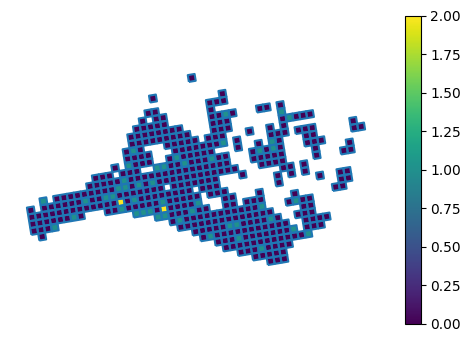

In [128]:
# Plot
geo_200["solution"] = solution_200
geo_200["solution"] = geo_200["solution"].astype(int)
fig, ax = plt.subplots(figsize=(6, 4))
geo_200.boundary.plot(ax=ax)
geo_200.plot(column='solution', ax=ax, legend=True, cmap='viridis')
ax.set_axis_off()
plt.show()

# Visualisations

In [ ]:
# Results IRIS

folder_path = "results/iris/"

